# Homework 3, Financial Data Science II

Due Monday, November 22 at 9:30 PM

**Be sure to submit both the .ipynb and .pdf files.**

**This homework is to be completed within your group. There should be one submission per group.**

### Part 1

On Canvas, in the folder for this homework assignment, you will find a data file named `subwithupb.csv`. This file consists of a randomly chosen 1000 rows out of the full data set that we will utilize later.

Read in this data set, and run it through the same Python notebooks that you created for HW 2. **You do not need to submit the results of this.** The code should work as before.

Note that this data set (and the full data set that will be used later) restricts the population to those loans which currently have an unpaid balance, i.e., only those rows for which `CURRENT_UPB` is greater than zero.

In [16]:
import pandas as pd

#from google.colab import drive 
#drive.mount('/content/drive')
#loandata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FDSII/subwithupb.csv", sep='|')

loandata = pd.read_csv("subwithupb.csv", sep='|')

loandata.columns = ("SOME_ID", "POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", 
                    "SERVICER", "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", 
                    "ORIG_UPB", "ISSUANCE_UPB", "CURRENT_UPB", "ORIG_TERM", 
                    "ORIG_DATE", "FIRST_PAY", "LOAN_AGE", "REM_MONTHS", 
                    "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                    "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", 
                    "PURPOSE", "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", 
                    "ZIP", "MI_PCT", "PRODUCT", "PPMT_FLG", "IO", 
                    "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO", "DLQ_STATUS", 
                    "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                    "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", 
                    "TOT_SCHD_PRNCPL", "UNSCHD_PRNCPL_CURR", 
                    "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                    "DISPOSITION_DATE", "FORECLOSURE_COSTS", 
                    "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                    "ASSET_RECOVERY_COSTS", 
                    "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                    "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                    "CREDIT_ENHANCEMENT_PROCEEDS", 
                    "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                    "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", 
                    "PRINCIPAL_FORGIVENESS_AMOUNT", "ORIGINAL_LIST_START_DATE", 
                    "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                    "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", 
                    "CURR_SCOREB", "CURR_SCOREC", "MI_TYPE", "SERV_IND", 
                    "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                    "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", 
                    "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                    "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", 
                    "HOMEREADY_PROGRAM_INDICATOR",
                    "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", 
                    "RELOCATION_MORTGAGE_INDICATOR",
                    "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", 
                    "LOAN_HOLDBACK_EFFECTIVE_DATE","DELINQUENT_ACCRUED_INTEREST", 
                    "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                    "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", 
                    "ARM_PRODUCT_TYPE", "MONTHS_UNTIL_FIRST_PAYMENT_RESET", 
                    "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                    "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", 
                    "ARM_INDEX","ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", 
                    "PERIODIC_INTEREST_RATE_CAP","LIFETIME_INTEREST_RATE_CAP", 
                    "MARGIN", "BALLOON_INDICATOR","PLAN_NUMBER", 
                    "FORBEARANCE_INDICATOR", 
                    "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                    "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", 
                    "ADR_UPB")
print(loandata.shape)
loandata.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(999, 109)


,SOME_ID,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,PRODUCT,PPMT_FLG,IO,FIRST_PAY_IO,MNTHS_TO_AMTZ_IO,...,ISSUE_SCOREB,ISSUE_SCOREC,CURR_SCOREB,CURR_SCOREC,MI_TYPE,SERV_IND,CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT,CUMULATIVE_MODIFICATION_LOSS_AMOUNT,CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS,CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS,HOMEREADY_PROGRAM_INDICATOR,FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT,RELOCATION_MORTGAGE_INDICATOR,ZERO_BALANCE_CODE_CHANGE_DATE,LOAN_HOLDBACK_INDICATOR,LOAN_HOLDBACK_EFFECTIVE_DATE,DELINQUENT_ACCRUED_INTEREST,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,ARM_5_YR_INDICATOR,ARM_PRODUCT_TYPE,MONTHS_UNTIL_FIRST_PAYMENT_RESET,MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET,INTEREST_RATE_CHANGE_DATE,PAYMENT_CHANGE_DATE,ARM_INDEX,ARM_CAP_STRUCTURE,INITIAL_INTEREST_RATE_CAP,PERIODIC_INTEREST_RATE_CAP,LIFETIME_INTEREST_RATE_CAP,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,4869132,5103,91390255,82021,C,"JPMorgan Chase Bank, National Association","JPMorgan Chase Bank, NA",FANNIE MAE,5.750,5.750,48000.0,47000.00,45490.79,360,32018,52018,40.0,320.0,320.0,42048.0,80.0,80,1.0,45.0,701.0,NaN,N,P,SF,1,I,AL,19460,356.0,NaN,FRM,N,N,NaN,NaN,...,714.0,NaN,652.0,NaN,NaN,N,NaN,0.0,NaN,0.0,N,NaN,N,NaN,NaN,NaN,NaN,A,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,7,N,CAS 2018 R07 G1,NaN,7,NaN,NaN
1,763024,1388,25278740,82021,C,"Wells Fargo Bank, N.A.","Wells Fargo Bank, N.A.",FANNIE MAE,3.750,3.750,194000.0,188357.18,123006.06,360,42013,62013,99.0,261.0,176.0,52043.0,95.0,95,2.0,32.0,792.0,789.0,N,R,SF,1,P,MI,19820,483.0,30.0,FRM,N,N,NaN,NaN,...,789.0,809.0,NaN,727.0,1.0,N,NaN,NaN,NaN,0.0,NaN,0.0,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,7,N,CAS 2014 C03 G2,NaN,C,1.0,1795.04
2,6824507,5228,125618945,82021,R,Other,Other,FANNIE MAE,3.000,3.000,416000.0,404421.64,404421.64,360,92020,112020,10.0,350.0,345.0,102050.0,75.0,75,2.0,29.0,771.0,808.0,N,R,SF,1,P,MN,33460,553.0,NaN,FRM,N,N,NaN,NaN,...,792.0,792.0,792.0,792.0,NaN,N,NaN,0.0,NaN,0.0,N,NaN,N,NaN,NaN,NaN,NaN,W,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,7,N,CAS 2021 R01 G1,NaN,7,NaN,NaN
3,5363906,5115,92620418,82021,R,"Wells Fargo Bank, N.A.","Wells Fargo Bank, N.A.",FANNIE MAE,5.875,5.875,146000.0,145000.00,140905.59,360,102018,122018,33.0,327.0,327.0,112048.0,75.0,75,1.0,42.0,736.0,NaN,N,C,PU,1,I,NC,20500,277.0,NaN,FRM,N,N,NaN,NaN,...,684.0,NaN,747.0,NaN,NaN,N,NaN,0.0,NaN,0.0,N,NaN,N,NaN,NaN,NaN,NaN,A,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,7,N,CAS 2019 R05 G1,NaN,7,NaN,NaN
4,110162,1372,23070680,82021,R,Other,New Residential Mortgage LLC,FANNIE MAE,4.375,4.375,95000.0,84437.20,28361.53,360,92012,112012,106.0,254.0,68.0,102042.0,80.0,80,1.0,13.0,744.0,NaN,N,P,SF,1,I,SC,43900,293.0,NaN,FRM,N,N,NaN,NaN,...,773.0,NaN,712.0,NaN,NaN,N,NaN,NaN,NaN,0.0,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,7,N,CAS 2013 C01 G1,NaN,7,NaN,NaN


In [17]:
import numpy as np
columns_with_all_nan = []
for col in loandata.columns:
  try:
    if np.all(np.isnan(loandata[col])):
      columns_with_all_nan.append(col)
  except:
    valueSet = set(loandata[col].tolist())
    if np.nan in valueSet:
      print("%s contains some NAN value!"%col)

print("##################################")
print("There are %d columns with all NAN values:"%len(columns_with_all_nan))
print(columns_with_all_nan)

MI_CANCEL_FLAG contains some NAN value!
HOMEREADY_PROGRAM_INDICATOR contains some NAN value!
LOAN_HOLDBACK_INDICATOR contains some NAN value!
PROPERTY_INSPECTION_WAIVER_INDICATOR contains some NAN value!
##################################
There are 39 columns with all NAN values:
['FIRST_PAY_IO', 'MNTHS_TO_AMTZ_IO', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_UPB', 'RPRCH_DTE', 'LAST_PAID_INSTALLMENT_DATE', 'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'ORIGINAL_LIST_START_DATE', 'ORIGINAL_LIST_PRICE', 'CURRENT_LIST_START_DATE', 'CURRENT_LIST_PRICE', 'CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS', 'ZERO_BALANCE_CODE_CHANGE_DATE', 'DELINQUENT_ACCRUED_INTEREST', 'ARM_5_YR_INDICATOR', 'ARM_PRODUCT_TYPE', 'MONTHS_UNTIL_

(999, 70)


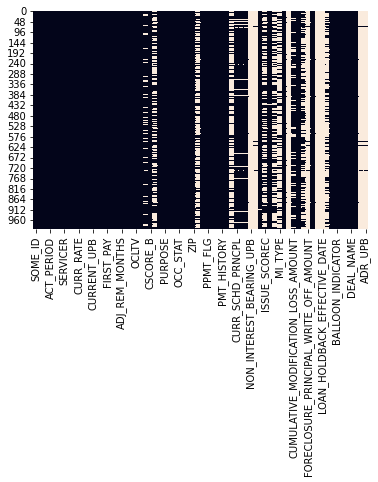

In [18]:
newLoandata = loandata.drop(columns=columns_with_all_nan)
print(newLoandata.shape)
import seaborn as sns
sns.heatmap(newLoandata.iloc[np.unique\
    (np.where(newLoandata.isnull())[0]),:]\
    .isnull(),cbar=False)

NON_INTEREST_BEARING_UPB with 991 NANs
CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT with 991 NANs
LOAN_HOLDBACK_INDICATOR with 998 NANs
LOAN_HOLDBACK_EFFECTIVE_DATE with 998 NANs
###################
These 4 columns above with few NANs would be dropped!
###################
There are still 21 columns with some NANs!
ADJ_REM_MONTHS has 9 NANs.
DTI has 178 NANs.
CSCORE_B has 1 NANs.
CSCORE_C has 500 NANs.
MI_PCT has 730 NANs.
MI_CANCEL_FLAG has 730 NANs.
CURR_SCHD_PRNCPL has 79 NANs.
TOT_SCHD_PRNCPL has 79 NANs.
UNSCHD_PRNCPL_CURR has 79 NANs.
PRINCIPAL_FORGIVENESS_AMOUNT has 967 NANs.
ISSUE_SCOREB has 12 NANs.
ISSUE_SCOREC has 510 NANs.
CURR_SCOREB has 21 NANs.
CURR_SCOREC has 503 NANs.
MI_TYPE has 730 NANs.
CUMULATIVE_MODIFICATION_LOSS_AMOUNT has 190 NANs.
HOMEREADY_PROGRAM_INDICATOR has 415 NANs.
FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT has 963 NANs.
PROPERTY_INSPECTION_WAIVER_INDICATOR has 663 NANs.
ADR_COUNT has 971 NANs.
ADR_UPB has 971 NANs.


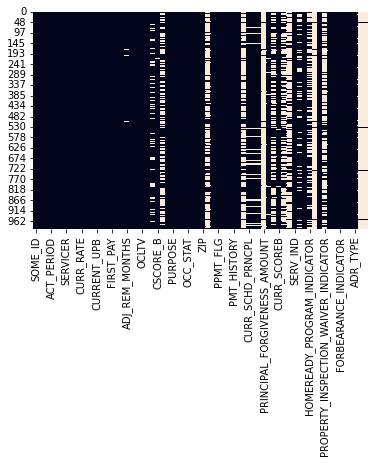

In [27]:
cols_with_almost_all_nans = []
cols_with_some_nans = []
for col in newLoandata.columns:
  try:
    num_of_nan = sum(np.isnan(newLoandata[col].tolist()))
    if num_of_nan / len(newLoandata) > 0.99:
      print(col, "with", num_of_nan, "NANs")
      cols_with_almost_all_nans.append(col)
    elif num_of_nan > 0:
      cols_with_some_nans.append([col, num_of_nan])
  except:
    nanCount = newLoandata[col].tolist().count(np.nan)
    if nanCount/len(newLoandata) > 0.99:
      print(col, "with", nanCount, "NANs")
      cols_with_almost_all_nans.append(col)
    elif nanCount>0:
      cols_with_some_nans.append([col, nanCount])

print("###################")
print("These %d columns above with few NANs would be dropped!"%len(cols_with_almost_all_nans))

print("###################")
print("There are still %d columns below with some NANs:"%len(cols_with_some_nans))
for col, c in cols_with_some_nans:
  print("%s has %d NANs."%(col, c))

newLoandata = newLoandata.drop(columns=cols_with_almost_all_nans)
import seaborn as sns
sns.heatmap(newLoandata.iloc[np.unique\
    (np.where(newLoandata.isnull())[0]),:]\
    .isnull(),cbar=False)

In [31]:
print(newLoandata.shape)
print(newLoandata.columns)
newLoandata.head()

(999, 66)
Index(['SOME_ID', 'POOL_ID', 'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER',
       'SERVICER', 'MASTER_SERVICER', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB',
       'ISSUANCE_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY',
       'LOAN_AGE', 'REM_MONTHS', 'ADJ_REM_MONTHS', 'MATR_DT', 'OLTV', 'OCLTV',
       'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG', 'PURPOSE',
       'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP', 'MI_PCT',
       'PRODUCT', 'PPMT_FLG', 'IO', 'DLQ_STATUS', 'PMT_HISTORY', 'MOD_FLAG',
       'MI_CANCEL_FLAG', 'CURR_SCHD_PRNCPL', 'TOT_SCHD_PRNCPL',
       'UNSCHD_PRNCPL_CURR', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'ISSUE_SCOREB',
       'ISSUE_SCOREC', 'CURR_SCOREB', 'CURR_SCOREC', 'MI_TYPE', 'SERV_IND',
       'CUMULATIVE_MODIFICATION_LOSS_AMOUNT',
       'CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS',
       'HOMEREADY_PROGRAM_INDICATOR', 'FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT',
       'RELOCATION_MORTGAGE_INDICATOR', 'PROPERTY_INSPECTION_WAIVER

,SOME_ID,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,CURRENT_UPB,ORIG_TERM,ORIG_DATE,FIRST_PAY,LOAN_AGE,REM_MONTHS,ADJ_REM_MONTHS,MATR_DT,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,CSCORE_C,FIRST_FLAG,PURPOSE,PROP,NO_UNITS,OCC_STAT,STATE,MSA,ZIP,MI_PCT,PRODUCT,PPMT_FLG,IO,DLQ_STATUS,PMT_HISTORY,MOD_FLAG,MI_CANCEL_FLAG,CURR_SCHD_PRNCPL,TOT_SCHD_PRNCPL,UNSCHD_PRNCPL_CURR,PRINCIPAL_FORGIVENESS_AMOUNT,ISSUE_SCOREB,ISSUE_SCOREC,CURR_SCOREB,CURR_SCOREC,MI_TYPE,SERV_IND,CUMULATIVE_MODIFICATION_LOSS_AMOUNT,CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS,HOMEREADY_PROGRAM_INDICATOR,FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT,RELOCATION_MORTGAGE_INDICATOR,PROPERTY_INSPECTION_WAIVER_INDICATOR,HIGH_BALANCE_LOAN_INDICATOR,BALLOON_INDICATOR,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,ADR_TYPE,ADR_COUNT,ADR_UPB
0,4869132,5103,91390255,2021-08-01,C,"JPMorgan Chase Bank, National Association","JPMorgan Chase Bank, NA",FANNIE MAE,5.750,5.750,48000.0,47000.00,45490.79,360,2018-03-01,2018-05-01,40.0,320.0,320.0,2048-04-01,80.0,80,1.0,45.0,701.0,NaN,N,P,SF,1,I,AL,19460,356.0,NaN,FRM,N,N,0.0,000000000000000000000000000000000000000000000000,N,NaN,59.99,59.99,0.0,NaN,714.0,NaN,652.0,NaN,NaN,N,0.0,0.0,N,NaN,N,A,N,N,7,N,CAS 2018 R07 G1,7,NaN,NaN
1,763024,1388,25278740,2021-08-01,C,"Wells Fargo Bank, N.A.","Wells Fargo Bank, N.A.",FANNIE MAE,3.750,3.750,194000.0,188357.18,123006.06,360,2013-04-01,2013-06-01,99.0,261.0,176.0,2043-05-01,95.0,95,2.0,32.0,792.0,789.0,N,R,SF,1,P,MI,19820,483.0,30.0,FRM,N,N,0.0,000000000000000001020000000000000000000000000000,N,Y,0.00,0.00,0.0,NaN,789.0,809.0,NaN,727.0,1.0,N,NaN,0.0,NaN,0.0,N,NaN,N,N,7,N,CAS 2014 C03 G2,C,1.0,1795.04
2,6824507,5228,125618945,2021-08-01,R,Other,Other,FANNIE MAE,3.000,3.000,416000.0,404421.64,404421.64,360,2020-09-01,2020-11-01,10.0,350.0,345.0,2050-10-01,75.0,75,2.0,29.0,771.0,808.0,N,R,SF,1,P,MN,33460,553.0,NaN,FRM,N,N,0.0,XXXXXXXXXXXXXXXXXXXXXXXXXX0000000000000000000000,N,NaN,NaN,NaN,NaN,NaN,792.0,792.0,792.0,792.0,NaN,N,0.0,0.0,N,NaN,N,W,N,N,7,N,CAS 2021 R01 G1,7,NaN,NaN
3,5363906,5115,92620418,2021-08-01,R,"Wells Fargo Bank, N.A.","Wells Fargo Bank, N.A.",FANNIE MAE,5.875,5.875,146000.0,145000.00,140905.59,360,2018-10-01,2018-12-01,33.0,327.0,327.0,2048-11-01,75.0,75,1.0,42.0,736.0,NaN,N,C,PU,1,I,NC,20500,277.0,NaN,FRM,N,N,0.0,000000000000000000000000000000000000000000000000,N,NaN,0.00,0.00,0.0,NaN,684.0,NaN,747.0,NaN,NaN,N,0.0,0.0,N,NaN,N,A,N,N,7,N,CAS 2019 R05 G1,7,NaN,NaN
4,110162,1372,23070680,2021-08-01,R,Other,New Residential Mortgage LLC,FANNIE MAE,4.375,4.375,95000.0,84437.20,28361.53,360,2012-09-01,2012-11-01,106.0,254.0,68.0,2042-10-01,80.0,80,1.0,13.0,744.0,NaN,N,P,SF,1,I,SC,43900,293.0,NaN,FRM,N,N,0.0,000000000000000000000000000000000000000000000000,N,NaN,370.57,370.57,0.0,NaN,773.0,NaN,712.0,NaN,NaN,N,NaN,0.0,NaN,NaN,N,NaN,N,N,7,N,CAS 2013 C01 G1,7,NaN,NaN


In [30]:
##### Convert dated object to date type.
dateCols = ['ACT_PERIOD', 'ORIG_DATE', 'FIRST_PAY', 'MATR_DT']
for col in dateCols:
  newLoandata[col]=pd.to_datetime(newLoandata[col],format='%m%Y', errors='coerce')


##### Convert some str objects to unordered categorical
catCols = ['SOME_ID', 'LOAN_ID', 'CHANNEL', 'SELLER', 'SERVICER', \
           'MASTER_SERVICER', 'PURPOSE', 'PROP', 'OCC_STAT', 'STATE',\
           'MSA', 'ZIP', 'PRODUCT', 'PMT_HISTORY', 'DEAL_NAME', 'ADR_TYPE'] 
for col in catCols:
  newLoandata[col] = newLoandata[col].astype('category')

##### Convert some objects to ordered categorical variables
ocatCols = ['NUM_BO', 'NO_UNITS', 'DTI', 'ORIG_TERM', 'OLTV', 'OCLTV', \
            'CSCORE_B', 'CSCORE_C', 'ISSUE_SCOREB', 'ISSUE_SCOREC',\
            'CURR_SCOREB', 'CURR_SCOREC']
for col in ocatCols:
  newLoandata[col] = newLoandata[col].astype('category').cat.as_ordered()

print(newLoandata.dtypes)

SOME_ID                                                     category
POOL_ID                                                        int64
LOAN_ID                                                     category
ACT_PERIOD                                            datetime64[ns]
CHANNEL                                                     category
                                                           ...      
HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR            object
DEAL_NAME                                                   category
ADR_TYPE                                                    category
ADR_COUNT                                                    float64
ADR_UPB                                                      float64
Length: 66, dtype: object


### Part 2

Install the package `gower`. You can read more about the package at https://pypi.org/project/gower/.

The Gower distance gives you a way of calculating the distance between rows of a data set, when those rows consist of a mix of variables on different scales.

Using the Gower distance, implement both (1) a nonlinear dimension reduction, and (2) a clustering of the 1000 rows of this data set.

This is going to require some thought, i.e., you should just not blindly use every column in the data set.

Turn in the code that you used for this, and also show some well-considered visualizations of the results.

In [ ]:
pip install gower

### Part 3

Using everything that you have learned so far regarding these data, possibly including the results from Part 2, formulate a hypothesis regarding the data. 

For example, imagine that one cluster contains mostly observations where `X1 = a` and `X2 = b`. I might then conclude that `X1` and `X2` are related in a way that when `X1 = a` it is more likely that `X2 = b`.

Or, try to think of more interesting things such as: "There is a stronger relationship between `X3` and `X4` when `X5=c`.

A good hypothesis has the following characteristics: (1) It can be justified through the visualization and possibly other analyses and (2) it can be tested formally using a statistical hypothesis test. **I am not asking you to perform such a test at this point.**

The best hypotheses will receive three bonus points (on a scale of 100) on their final project.

In [ ]:
import gower